# Video Game Sales Analisys

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
pd.set_option('display.max_columns', None)

### Data Info

In [2]:
data = pd.read_csv('vgsales.csv')

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Data Cleaning

**Year column contains some missing values, lets replace with the median of the years**

In [5]:
data['Year'] = data['Year'].replace(np.nan, int(np.median(data['Year'][~np.isnan(data['Year'])])))

**Publisher column contains some missing values, lets replace with 'Unknown'**

In [6]:
data['Publisher'] = data['Publisher'].replace(np.nan, 'Unknown')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16598 non-null float64
Genre           16598 non-null object
Publisher       16598 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Now, our data is free of missing values**

In [8]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.416134,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781686,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Exploring Data

<br>

### Publishers

**Most common Publishers**

In [9]:
top_pub = data['Publisher'].value_counts().head(15)
top_pub

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Capcom                           381
Atari                            363
Tecmo Koei                       338
Unknown                          261
Square Enix                      233
Name: Publisher, dtype: int64

**Overall Sales by top Publishers**

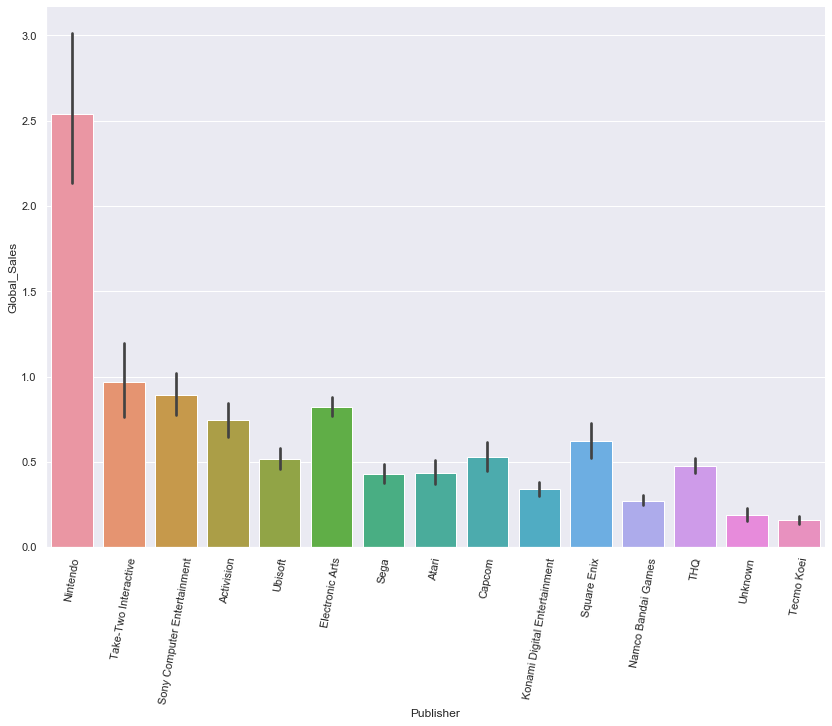

In [10]:
data_pub = data[data['Publisher'].isin(top_pub.index)]
p = sns.catplot(data = data_pub, x='Publisher', y='Global_Sales', kind='bar', height=8.27, aspect=11.7/8.27)
p.set_xticklabels(rotation=80)

**North America Sales**

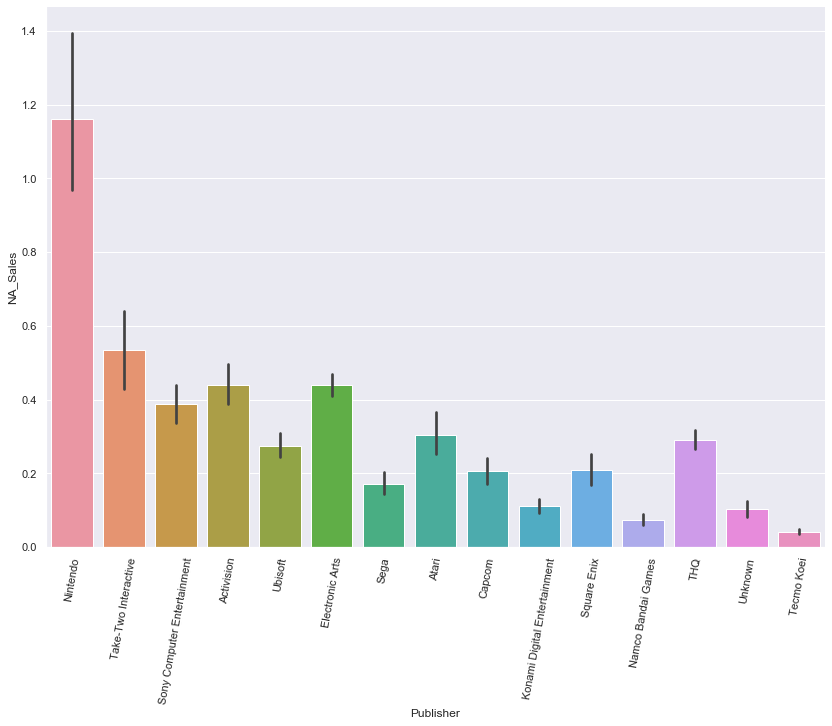

In [11]:
p = sns.catplot(data = data_pub, x='Publisher', y='NA_Sales', kind='bar', height=8.27, aspect=11.7/8.27)
p.set_xticklabels(rotation=80)

**Europe Sales**

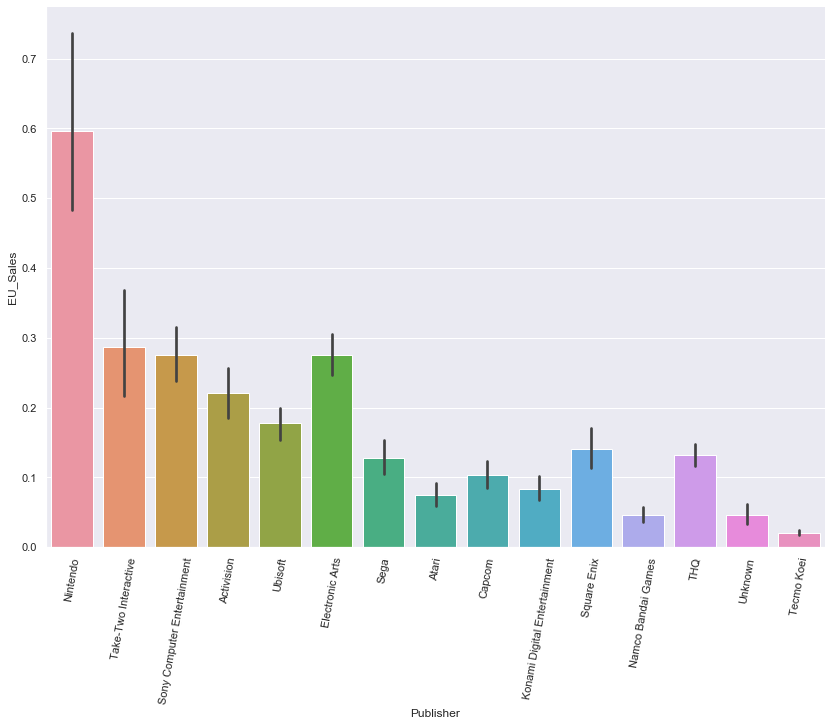

In [12]:
p = sns.catplot(data = data_pub, x='Publisher', y='EU_Sales', kind='bar', height=8.27, aspect=11.7/8.27)
p.set_xticklabels(rotation=80)

**Japan Sales**

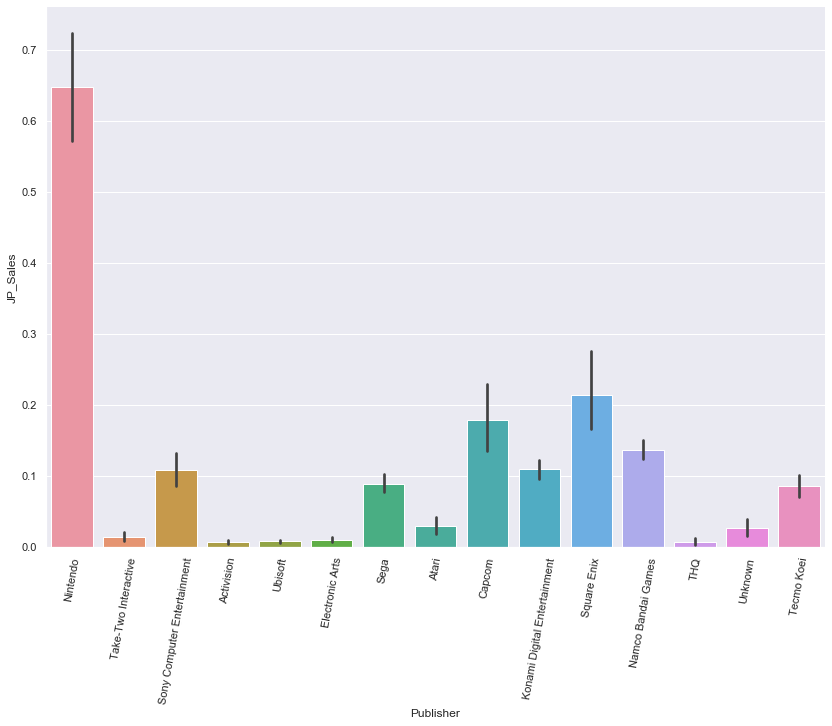

In [13]:
p = sns.catplot(data = data_pub, x='Publisher', y='JP_Sales', kind='bar', height=8.27, aspect=11.7/8.27)
p.set_xticklabels(rotation=80)

### Video Game Releases by Year

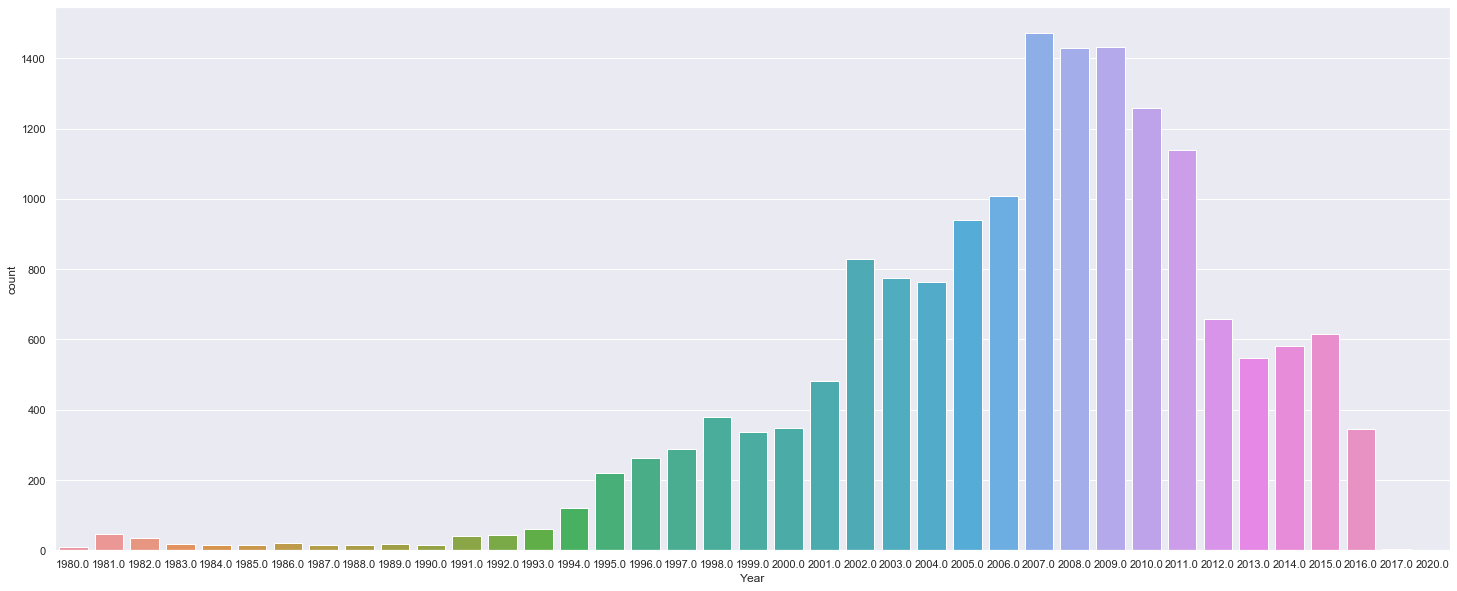

In [14]:
plt.figure(figsize=(25,10))
sns.countplot(x=data['Year'])

### Video Game Revenue by Year

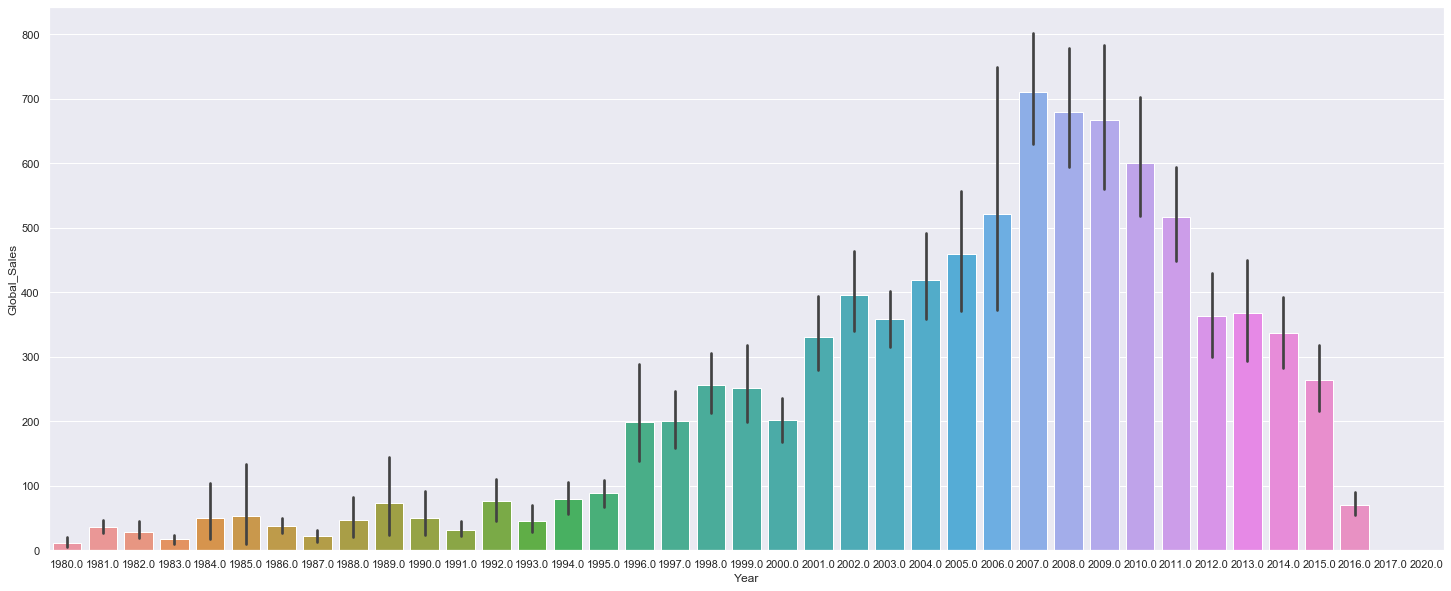

In [15]:
plt.figure(figsize=(25,10))
sns.barplot(x=data['Year'], y=data['Global_Sales'], estimator=sum)

### Top Publisher Revenue by Year

In [29]:
pd.set_option('display.max_rows', None)
#Grouping the year by each publisher revenue
data.groupby(['Year','Publisher']).agg({'Global_Sales':sum})
#Getting 'group by' on Global _Sales
g = year_pub['Global_Sales'].groupby(level=0, group_keys=False)
#Getting the largest publisher sale in each year
g = g.nlargest(1)

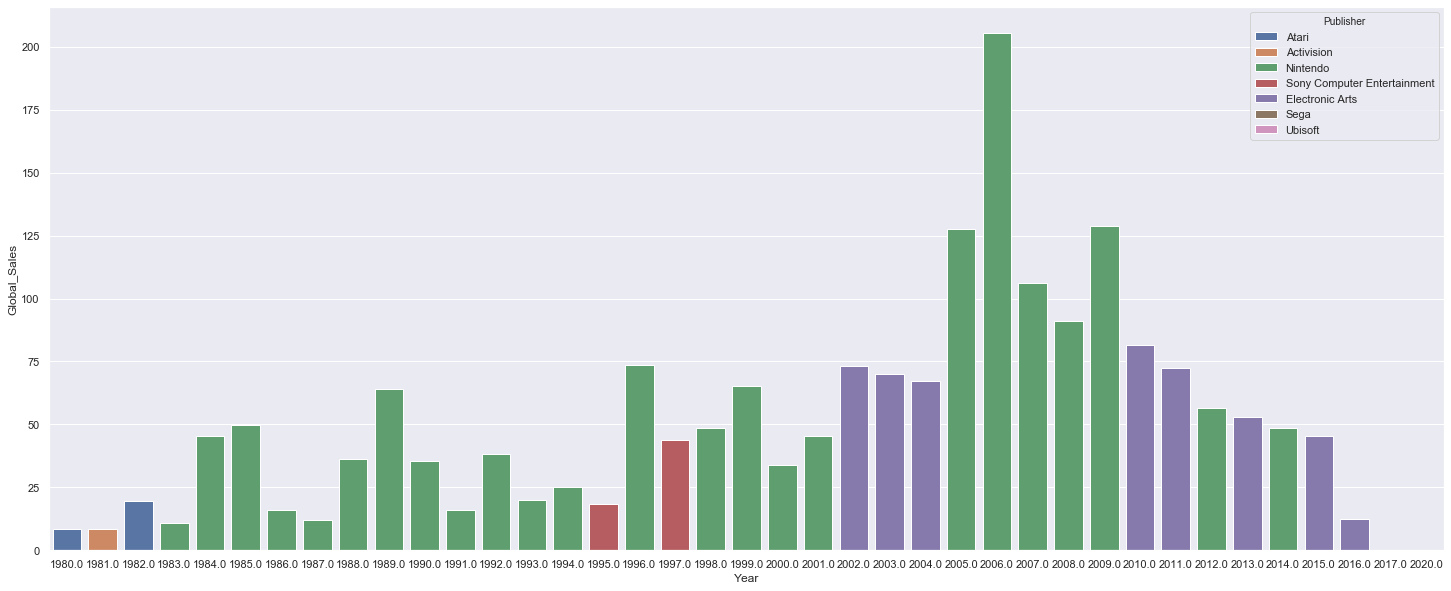

In [17]:
#Extracting Variables
years = g.index.droplevel(level=1)
publishers = g.index.droplevel(level=0)

#Plotting
plt.figure(figsize=(25,10))
sns.barplot(x=years, y=g, hue=publishers, dodge=False, estimator=sum)

### Top Game Revenue by Year

In [18]:
game_year = data.groupby(['Year', 'Name']).agg({'Global_Sales':sum})
g = game_year['Global_Sales'].groupby(level=0, group_keys=False)
g = g.nlargest(1)

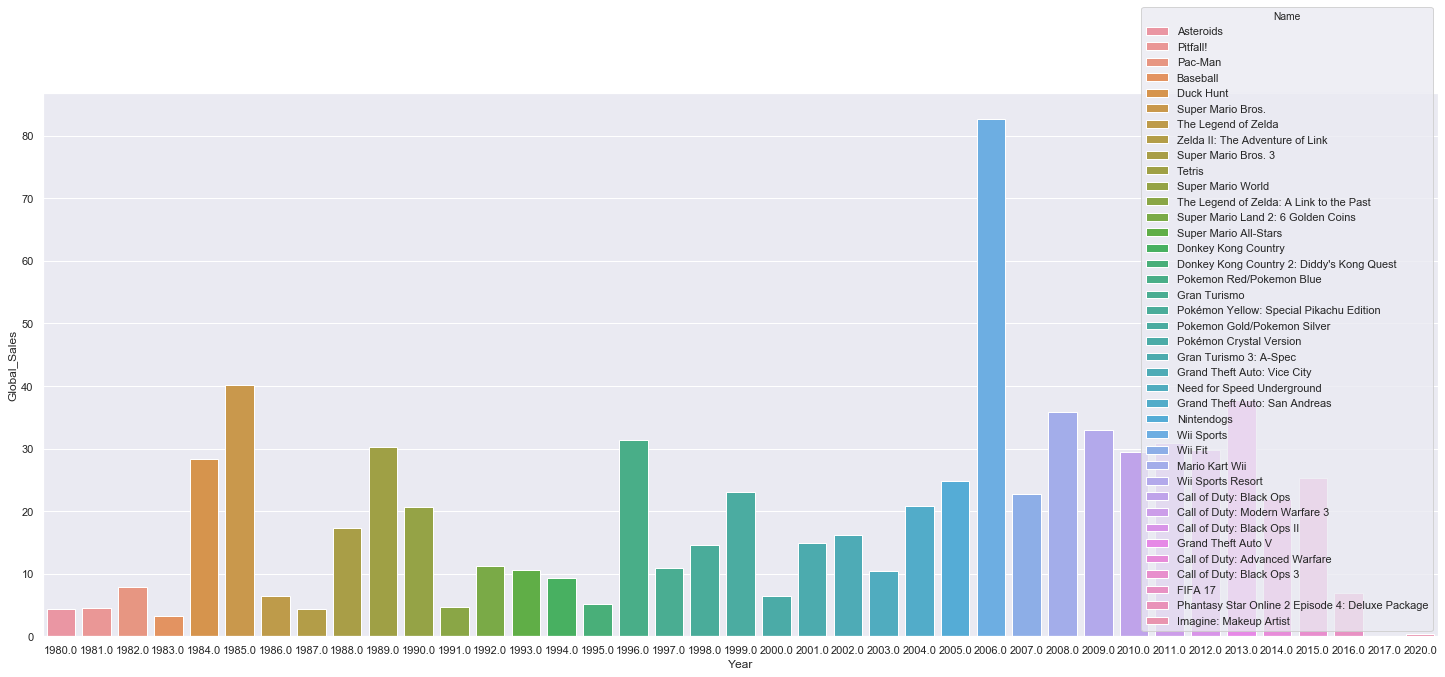

In [19]:
years = g.index.droplevel(level=1)
games = g.index.droplevel(level=0)

plt.figure(figsize=(25,10))
sns.barplot(x=years, y=g, hue=games, dodge=False, estimator=sum)

### Top Platform Game Revenue by Year

In [20]:
plat_year = data.groupby(['Year', 'Platform']).agg({'Global_Sales':sum})
g = plat_year['Global_Sales'].groupby(level=0, group_keys=False)
g = g.nlargest(1)

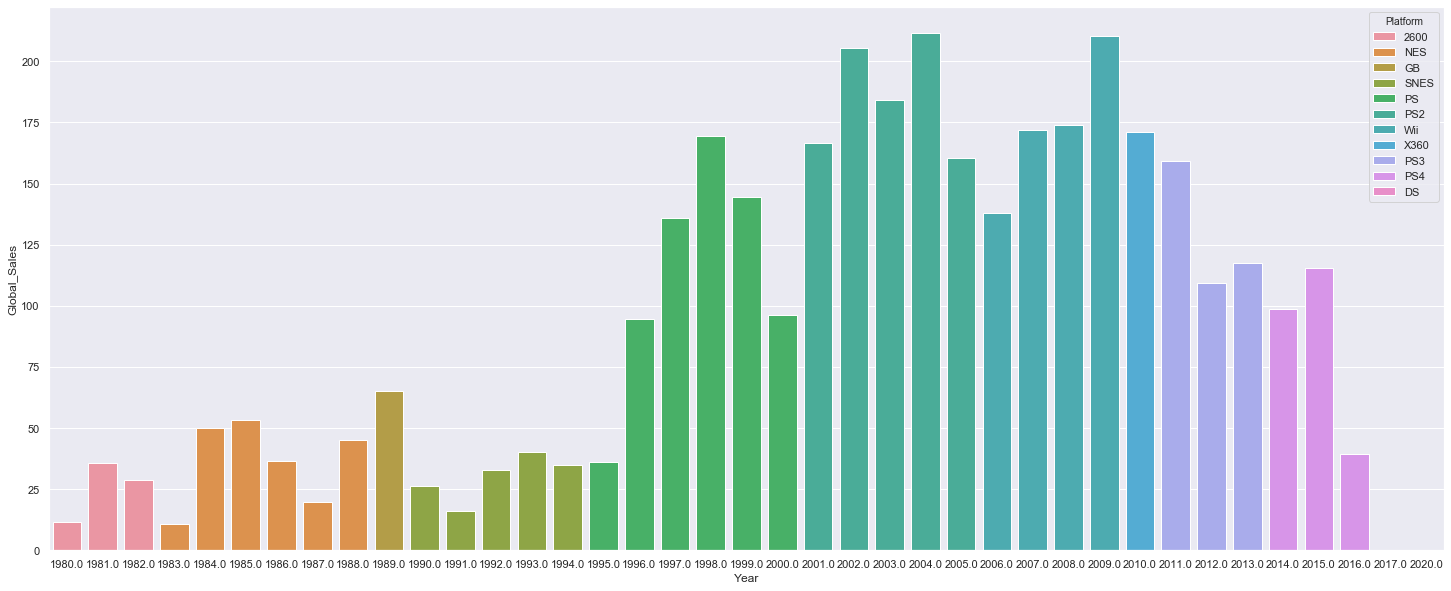

In [21]:
years = g.index.droplevel(level=1)
plat = g.index.droplevel(level=0)

plt.figure(figsize=(25,10))
sns.barplot(x=years, y=g, hue=plat, dodge=False, estimator=sum)

### Evolution of Most Famous Publishers

In [22]:
#Get the group of publishers by each year revenue
publisher_revenue_year = data.groupby(['Publisher', 'Year'])['Global_Sales'].sum()
#Extract the variables from the group by
years = publisher_revenue_year.index.droplevel(level=0)
pub = publisher_revenue_year.index.droplevel(level=1)
#Transform into a single dataframe
evolution_pub = pd.DataFrame({'Publisher':pub, 'Year':years, 'Revenue':publisher_revenue_year.values})
evolution_pub.head()

,Publisher,Year,Revenue
0,10TACLE Studios,2006.0,0.02
1,10TACLE Studios,2007.0,0.09
2,1C Company,2009.0,0.01
3,1C Company,2011.0,0.09
4,20th Century Fox Video Games,1981.0,1.35


In [23]:
#Get the most famous publishers by number of releases
top_pub = evolution_pub['Publisher'].value_counts().head(10)
top_pub

Nintendo                        34
Namco Bandai Games              33
Activision                      32
Capcom                          31
Konami Digital Entertainment    30
Sega                            29
Tecmo Koei                      26
Hudson Soft                     24
Electronic Arts                 24
Ubisoft                         23
Name: Publisher, dtype: int64

In [24]:
#Get the dataset of the most famous publishers
most_famous_pub = evolution_pub[evolution_pub['Publisher'].isin(top_pub.index)]
most_famous_pub.head(10)

,Publisher,Year,Revenue
90,Activision,1980.0,3.02
91,Activision,1981.0,8.50
92,Activision,1982.0,1.86
93,Activision,1983.0,1.94
94,Activision,1984.0,0.27
95,Activision,1985.0,0.48
96,Activision,1987.0,1.12
97,Activision,1988.0,0.75
98,Activision,1989.0,0.47
99,Activision,1994.0,2.08


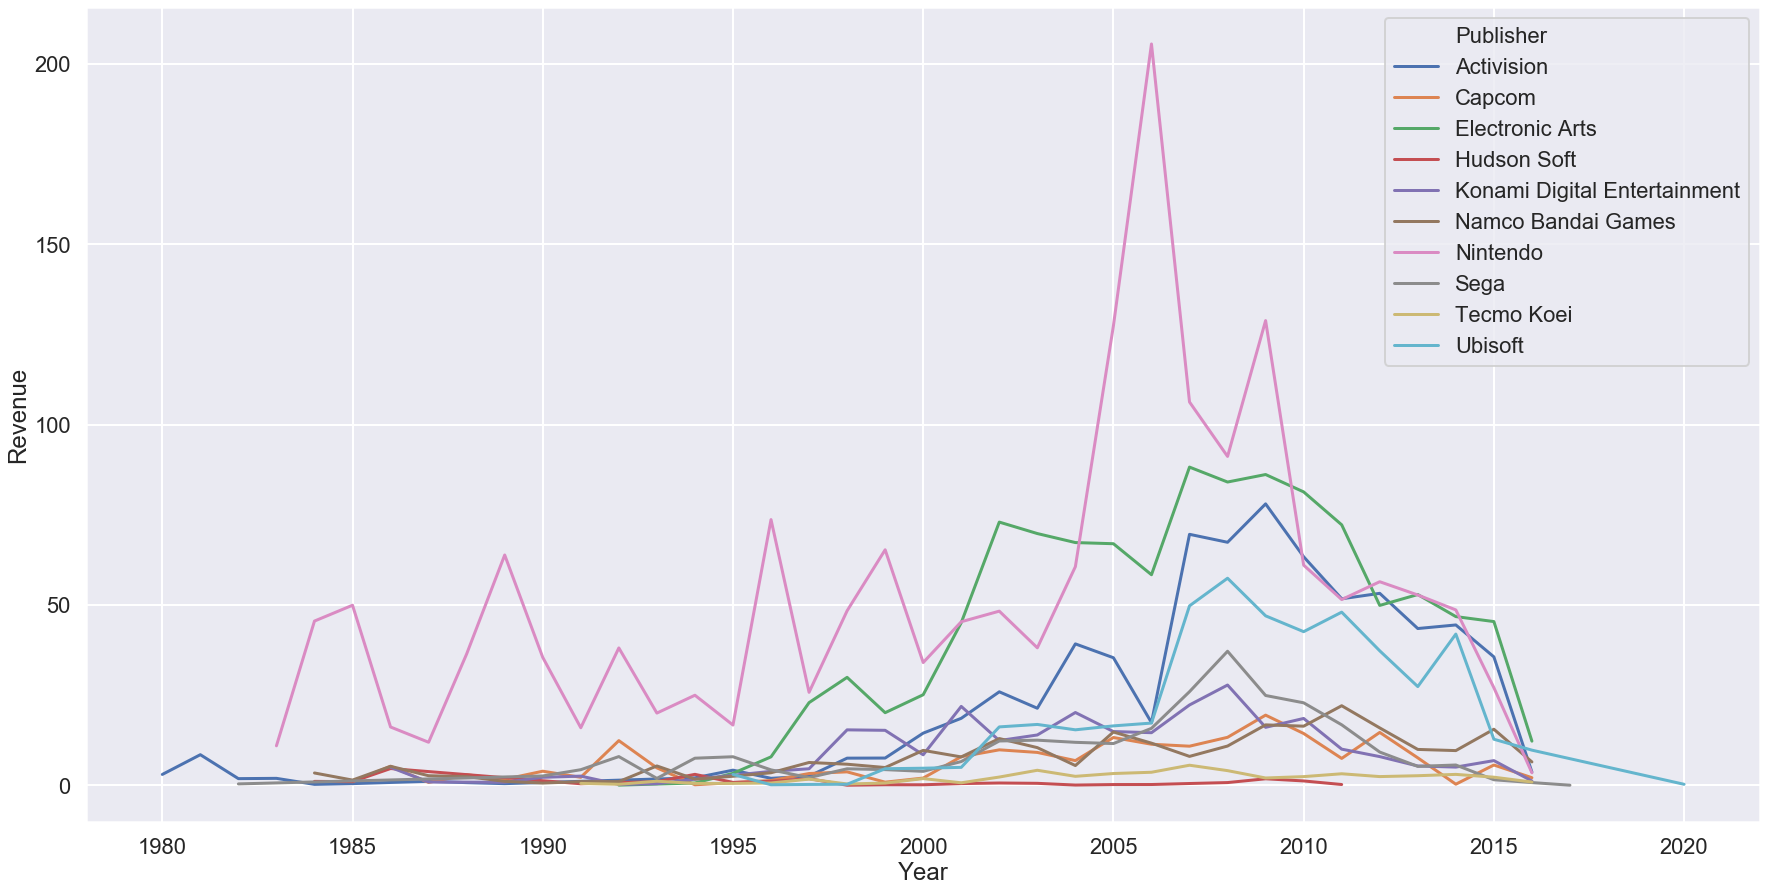

In [25]:
#Plot the revenue by each year
plt.figure(figsize=(30,15))
sns.set(font_scale=2)
sns.set_context("poster")
sns.lineplot(data=most_famous_pub, x='Year', y='Revenue', hue='Publisher')

### Evolution of Genres

In [26]:
#Get the group of genres by each year revenue
genres_revenue_year = data.groupby(['Genre', 'Year'])['Global_Sales'].sum()
#Extracting the variables from the group
genre = genres_revenue_year.index.droplevel(level=1)
year = genres_revenue_year.index.droplevel(level=0)
#Tranforming into a single DataFrame
genres_evo = pd.DataFrame({'Genre':genre, 'Year':year, 'Revenue':genres_revenue_year.values})
genres_evo.head(10)

,Genre,Year,Revenue
0,Action,1980.0,0.34
1,Action,1981.0,14.84
2,Action,1982.0,6.52
3,Action,1983.0,2.86
4,Action,1984.0,1.85
5,Action,1985.0,3.52
6,Action,1986.0,13.74
7,Action,1987.0,1.12
8,Action,1988.0,1.75
9,Action,1989.0,4.64


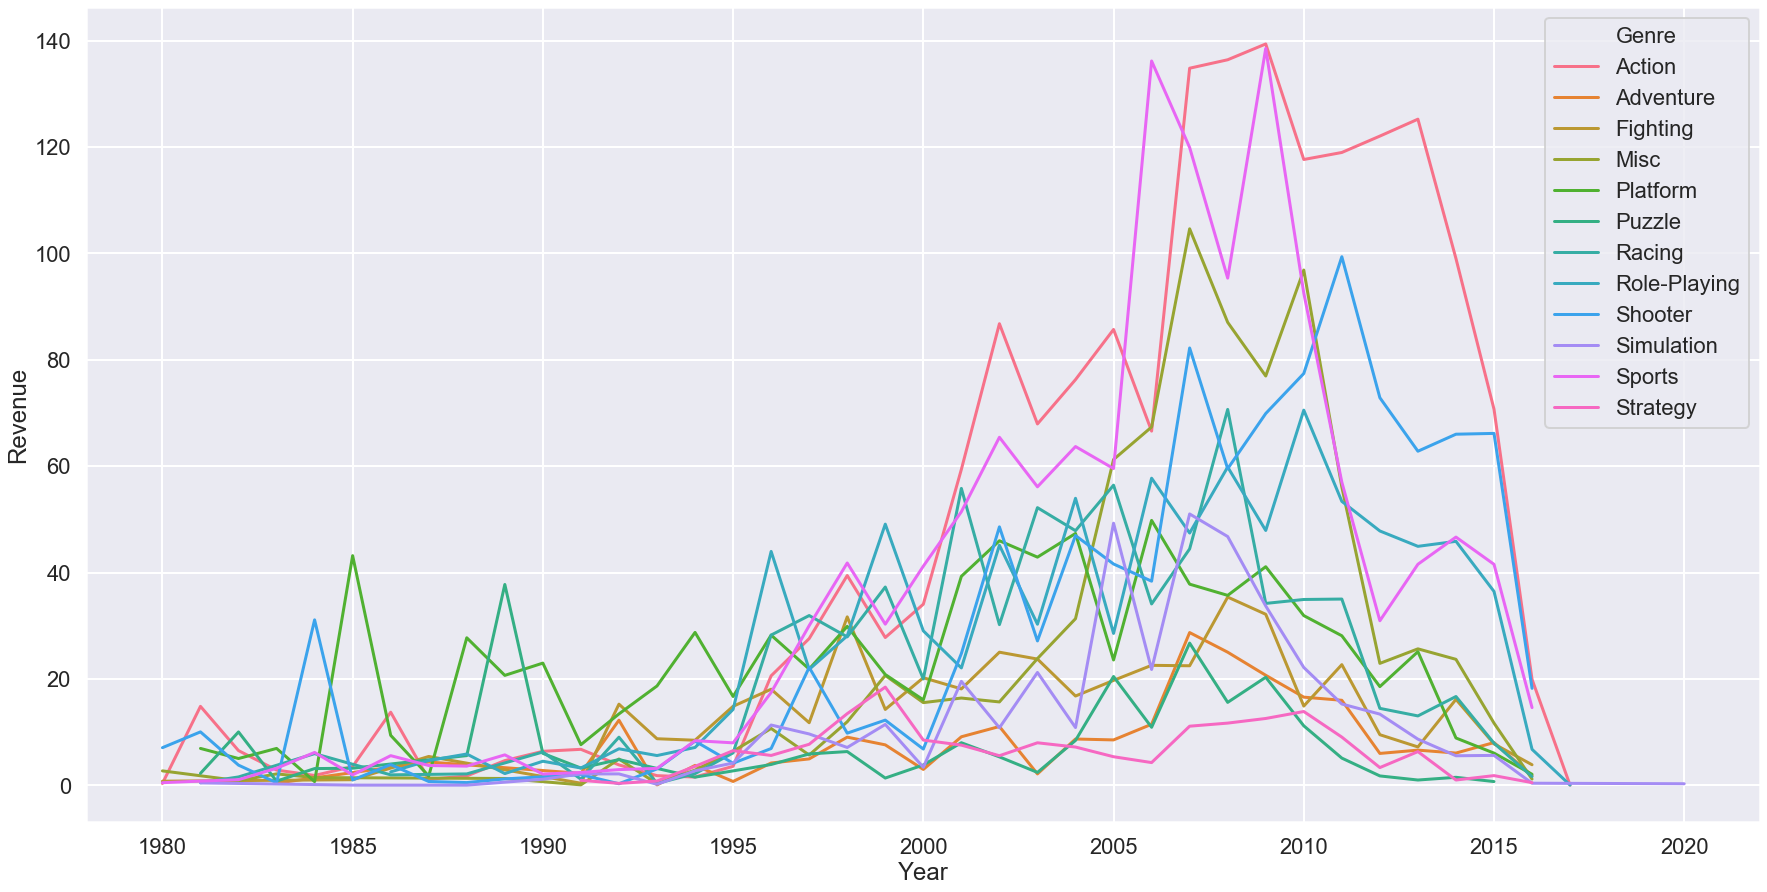

In [27]:
#Plotting
plt.figure(figsize=(30,15))
sns.lineplot(data=genres_evo, x='Year', y='Revenue', hue='Genre')